In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [28]:
# Load the data into a DataFrame
data = pd.read_csv('Dataset/Dataset Smart Irrigation Systems in Agriculture.csv')
data.head()

,id,temperature,pressure,altitude,soil_moisture,note,status,class,date,time
0,1,29.10,9984.53,12.21-,377,0,0,Very Dry,08/10/2022,22:06:24
1,2,29.08,9984.36,12.22-,379,0,0,Very Dry,08/10/2022,22:06:24
2,3,29.06,9984.56,12.20-,376,0,0,Very Dry,08/10/2022,22:06:24
3,4,29.05,9984.39,12.22-,377,0,0,Very Dry,08/10/2022,22:06:24
4,5,29.03,9984.42,12.21-,379,0,0,Very Dry,08/10/2022,22:06:24


In [29]:
# Convert 'class' to numerical labels
print(data['class'].unique())
data['class'] = data['class'].astype('category').cat.codes
print(data['class'].unique())

['Very Dry' 'Dry' 'Wet' 'Very Wet']
[1 0 3 2]


In [30]:
# Clean the 'altitude' column by removing non-numeric characters and converting to float
data['altitude'] = data['altitude'].str.replace('[^0-9.]', '', regex=True).astype(float)

In [31]:
# Features and target
X = data[['temperature', 'pressure', 'altitude', 'soil_moisture']]
y = data['class']

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train a model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions
y_pred = model.predict(X_test)

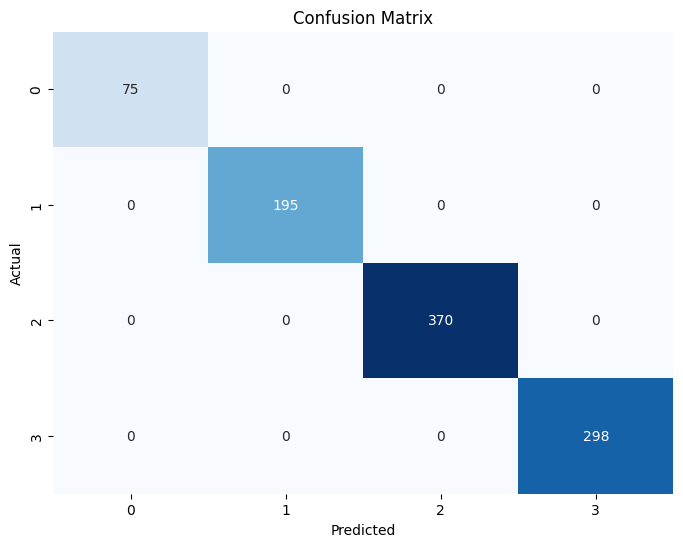

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


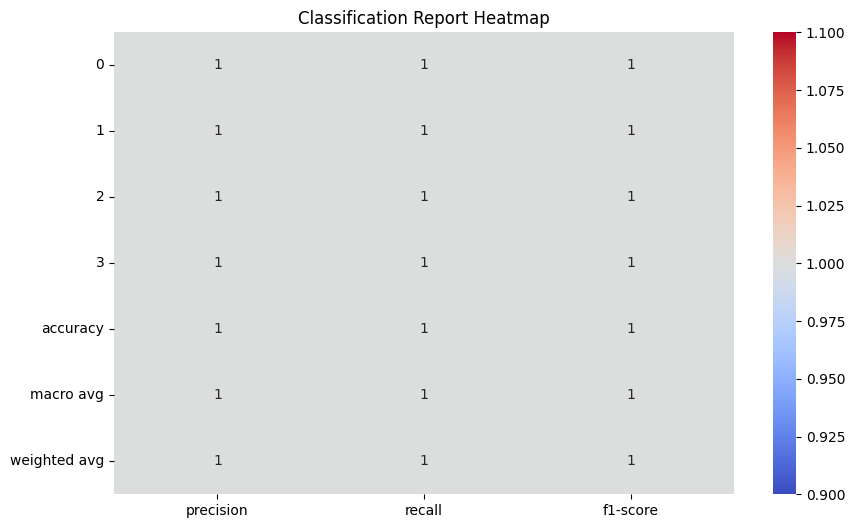

In [36]:
from sklearn.metrics import classification_report
import pandas as pd

# Classification Report as a Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title("Classification Report Heatmap")
plt.show()


In [37]:
# Save the model
joblib.dump(model, 'soil_moisture_model.pkl')
print("Model saved as 'soil_moisture_model.pkl'")

Model saved as 'soil_moisture_model.pkl'
